# KNN Using Scikit Learn

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


import mglearn


import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cancer = load_breast_cancer()
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [3]:
print(cancer.feature_names)
print(cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [4]:
cancer.data


array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [5]:
type(cancer.data)

numpy.ndarray

In [6]:
cancer.data.shape


(569, 30)

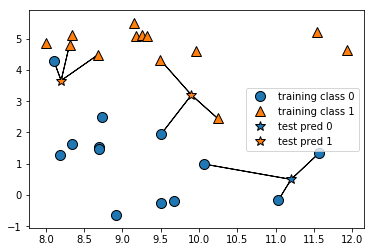

In [9]:
#KNN overview
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

cancer = load_breast_cancer()

X_train, X_test, Y_train, Y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [3]:
print('Accurecy of knn n-5 on training set is:{:.3f}'.format(knn.score(X_train,Y_train)))
print('Accurecy of knn n-5 on test set is:{:.3f}'.format(knn.score(X_test,Y_test)))

Accurecy of knn n-5 on training set is:0.946
Accurecy of knn n-5 on test set is:0.930


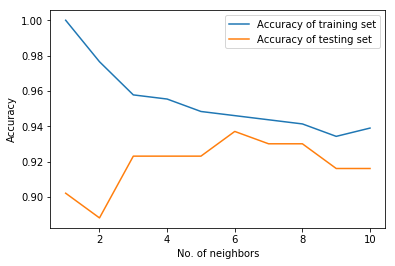

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=66)

training_accuracy = []
testing_accuracy = []

neighbors_settings = range(1, 11)

for n in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors = n)
    clf.fit(X_train, Y_train)
    training_accuracy.append(clf.score(X_train, Y_train))
    testing_accuracy.append(clf.score(X_test, Y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="Accuracy of training set")
plt.plot(neighbors_settings, testing_accuracy, label="Accuracy of testing set")
plt.ylabel('Accuracy')
plt.xlabel('No. of neighbors')
plt.legend()